# Predicting Diabetes Outcome of Patients in a Dataset
### By Feven Huruy, Christina Zhang, Xuechao Zhou

# Introduction

In the United States, the number of people with diabetes (too much glucose, or sugar, in the blood) have been increasing at an alarming rate where [34.2 million Americans are estimated to have the disease](https://diabetesresearch.org/diabetes-statistics/). There are two types (type 1 and type 2) of diabetes which both ultimately lead to the body not making enough insulin to lower glucose in the blood. Type 1 is a genetic condition while type 2 (the most common one) is developed over time as a result of [life-style habits](https://www.diabetes.org.uk/diabetes-the-basics/differences-between-type-1-and-type-2-diabetes). Diabetes can have an impact on many physiological systems and is linked to major problems including, but not limited to, heart disease, stroke, blindness, and renal failure. In the U.S., diabetes was found to be the seventh leading cause of mortality highlighting the fatality of this disease. 
To learn more click on the hyperlinks above.

In this tutorial, we will look at a dataset from Kaggle that can be [found here](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset) that was originally obtained from the National Institute of Diabetes and Digestive and Kidney Diseases where the objective "is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset." These diagnostic measurements are:

**Pregnancies**              = number of pregnancies

**Glucose**                  = glucose level in the blood (plasma glucose concentration)

**BloodPressure**            = diastolic blood pressure (mm Hg)

**SkinThickness**            = triceps skin fold thickness (mm)

**Insulin**                  = insulin level in the blood / 2-Hour serum insulin (mu U/ml)

**BMI**                      = body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction** = function which scores likelihood of diabetes based on family history

**Age**                      = age in years

**Outcome**                  = 0 if the patient does not have diabetes, 1 if the patient does

All the patients in the dataset are females of Pima Indian heritage who are at least 21 years of age.

We will load the data, perform exploratory analysis to gain insights about the data, do hypothesis testing to draw conclusions through statistical testing, and then use classification algorithms to build a model that accurately predicts whether a patient in the dataset has diabetes. 

# Data Preparation

We will need to import the following packages for this tutorial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from scipy.stats import normaltest, ttest_ind, mannwhitneyu, spearmanr

Since the diabetes data is contained in a csv file, which can be exported from Kaggle, we use the Pandas csv read_csv function to create a dataframe that contains all of the data from the csv file. After getting the data, we want to look at the aspects of the dataframe through the info and describe functions.

In [2]:
# Extracting data from the file
data = pd.read_csv('diabetes.csv')

# Getting the details of the dataframe
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that there are 768 non-null entries for each column that are all numbers, so there are seemingly no missing values. However, the describe function reveals that there is a minimum value of zero in some columns that are extremely questionable. We can see that there are zeroes in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns that would be biologically impossible. These zeroes may be meant to represent missing values, but there was no note of that by the creators of the dataset so we can't be sure. 

Let's do some data visualization on this dataset to get a clearer idea on how the data actually looks and how the features relate to the outcomes.

# Data Visualization

### Count Plot

We will now use a count plot to see how many patients in the dataset have each outcome.

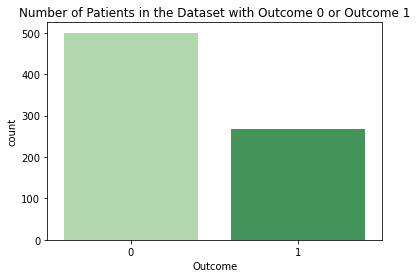

In [3]:
# Creating the count plot
sns.countplot(data = data, x = data['Outcome'], palette = 'Greens')
plt.title("Number of Patients in the Dataset with Outcome 0 or Outcome 1")
plt.show()

We can see that most of the patients in the dataset do not have diabetes. It seems that almost 65% (500/768) of the dataset has patients without diabetes and nearly 35% do.

We will now create a box plot to view the statistical relationship between the features and Diabetes Outcomes

### Box Plots

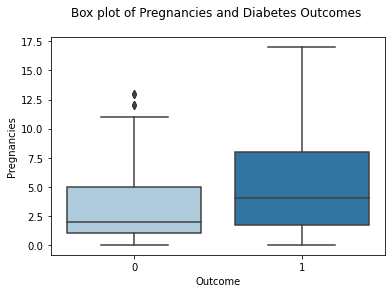

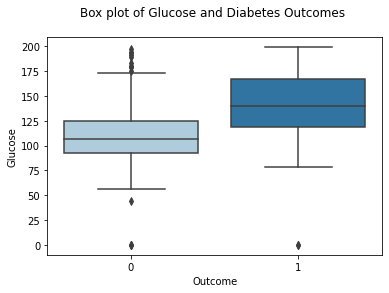

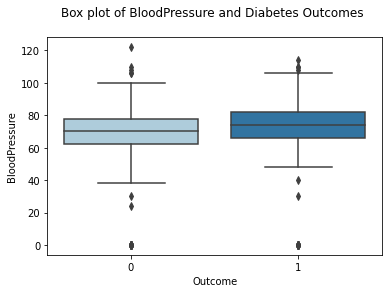

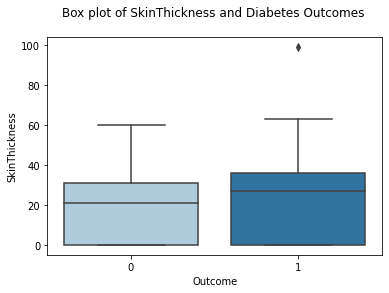

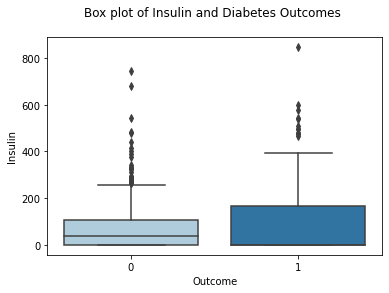

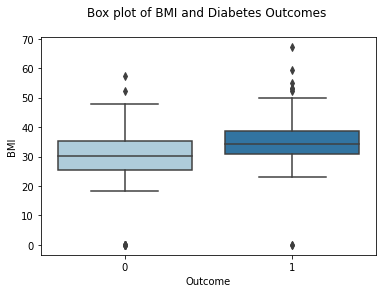

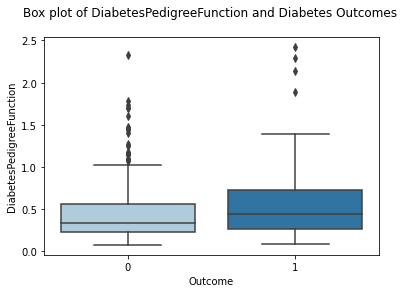

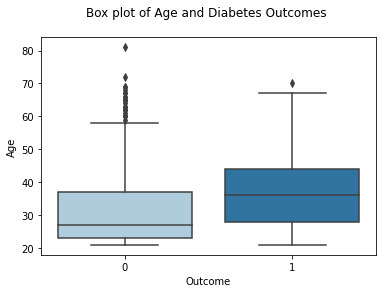

In [4]:
# Iterating through the columns and creating a boxplot for each feature in regard to outcome 
for col in data.columns:
    if col != 'Outcome':
        sns.boxplot(data = data, x = 'Outcome', y = col, palette = "Paired")
        titlestring = "Box plot of " + col + " and Diabetes Outcomes \n"
        plt.title(titlestring)
        plt.show()

The box plots show that the median for outcome 1 (patients with diabetes) is higher than outcome 0 across all of the features as well as the upper quartile. The lower quartile is the same for both outcomes in Insulin and SkinThickness, but higher for outcome 0 in the rest of the features. This makes sense since people with diabetes tend to have [higher glucose levels](https://www.mayoclinic.org/diseases-conditions/hyperglycemia/symptoms-causes/syc-20373631) and usually need to be administered insulin to lower these glucose levels which may contribute to higher insulin levels. Diabetes usually occurs in [middle-aged and older adults](https://www.nia.nih.gov/health/diabetes-older-people) which is also reflected in the box plot for age where the median for outcome 1 is between 30 and 40 years old. Overall, the dataset seems to reflect that the diabetes outcome is associated with higher levels of all the features.

The box plots also show that many of the features have outliers. One approach to cleaning the data could be to remove these outlier or replace them with the mean/median value, but since there seems to be many of them overall it may be better not to remove them to prevent modifying too much of the data. Furthermore, they may represent natural variations as opposed to measurement errors, so they may be true outliers that can be left in the dataset which is how we're choosing to treat them.

Now we will create a heatmap to view a correlation matrix in order to see the relationship between each of the features/variables (how correlated they are)

### Heat Map

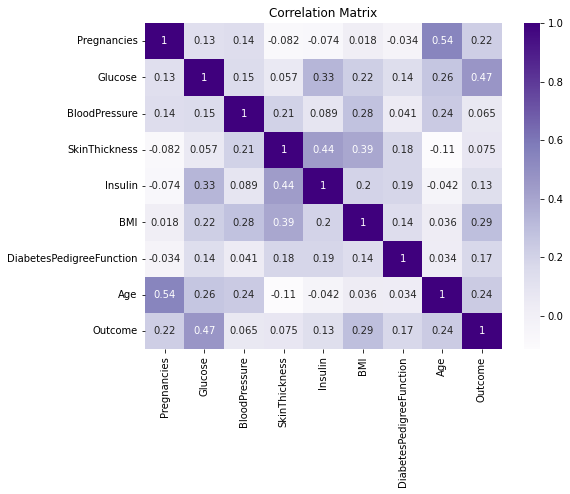

In [5]:
# Computes pairwise correlation (corr()) of columns and then uses it to make a heatmap
corr = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,annot = True,cmap = 'Purples')
plt.title("Correlation Matrix")
plt.show()

The lighter color indicates that there is little correlation between them while darker colors indicate a strong correlation. According to the heatmap, above the most correlated feature to the target variable 'Outcome' is 'Glucose' which is 0.47 and the second most correlated is 'BMI' is 0.29. However, overall, we don't see much correlation among the variables except for 'Pregnancies' and 'Age', which is pretty intuitive since age affects fertility, and 'Insulin' and 'SkinThickness'.

We can look at the correlations more closely with scatterplots.

### Scatterplots

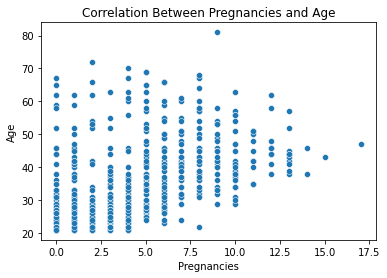

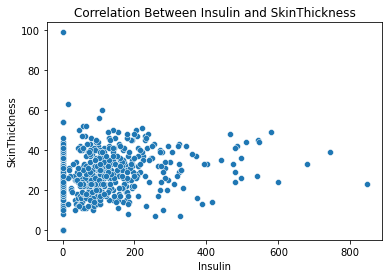

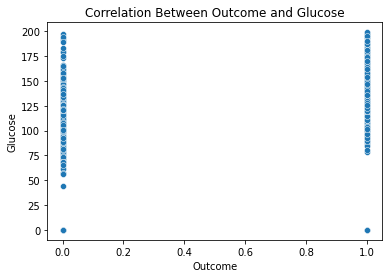

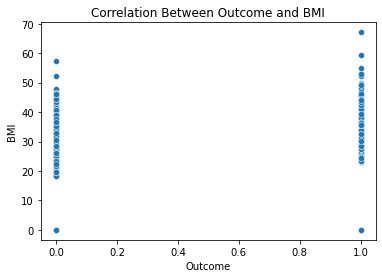

In [6]:
# Creating scatterplots between specific columns
sns.scatterplot(x = 'Pregnancies', y = 'Age', data = data)
plt.title("Correlation Between Pregnancies and Age")
plt.show()

sns.scatterplot(x = 'Insulin', y = 'SkinThickness', data = data)
plt.title("Correlation Between Insulin and SkinThickness")
plt.show()

sns.scatterplot(x = 'Outcome', y = 'Glucose', data = data)
plt.title("Correlation Between Outcome and Glucose")
plt.show()

sns.scatterplot(x = 'Outcome', y = 'BMI', data = data)
plt.title("Correlation Between Outcome and BMI")
plt.show()

The scatterplots don't really show a linear trend. We can see in the Pregnancies vs Age plot that most of the lower number of pregnancies happen with patients younger in age and that the density of the data points lower as number of pregnancies get higher. As for Insulin vs Outcome, we can see a large cluster of data point in the lower left portion of the plot highlighting that it's common within the dataset for a patient to have an Insulin level between 0 and 200 accompanied with a SkinThickness between 0 and 40. The last two scatterplots involving Outcome does not tell us much since the data can only lie in two places, 0 and 1. 
However, using a distribution plot will allow us to look at the distribution of the data for each outcome which will provide us with more information.

Now we will look at the data distribution of each feature in regards to the diabetes outcome using [Seaborn's distplot](https://www.digitalocean.com/community/tutorials/seaborn-distplot). We use kernal density estimation as a non-parametic (a statistical method where the data doesn't have to fit a normal distribution) way to estimate the probability of distribution of a variable. It's important to look at the distribution of data in order to see if variables are normally distributed or skewed to make more informed choices about what statistical tests to use on the data since some require the data to be normally distributed. To learn more, visit this [article.](https://medium.com/fintechexplained/ever-wondered-why-normal-distribution-is-so-important-110a482abee3) 

### Distribution Plots

/tmp/ipykernel_120/656021879.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for col in data.drop('Outcome',1).columns:


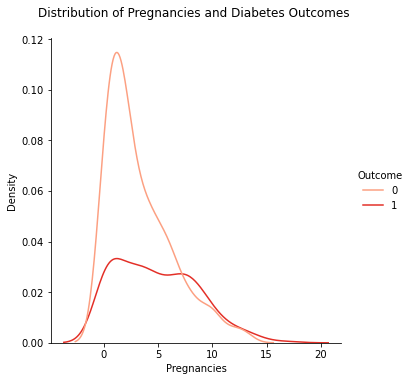

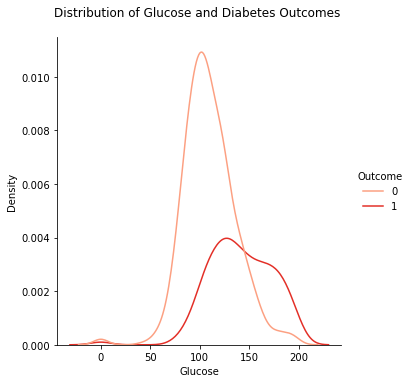

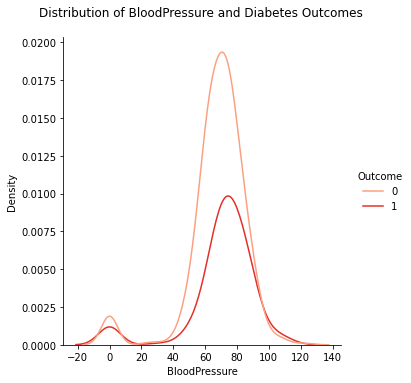

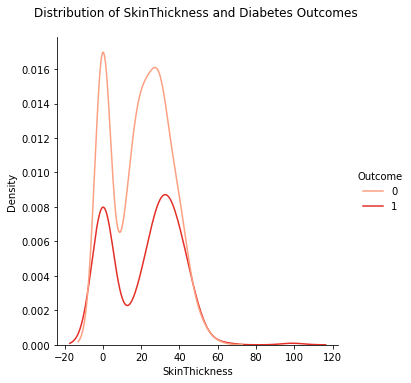

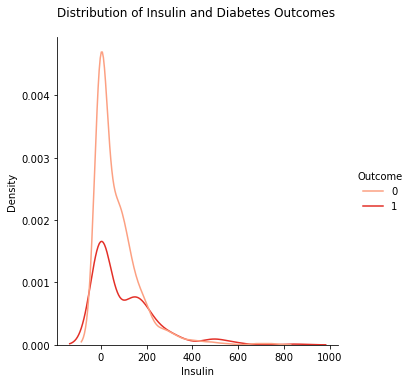

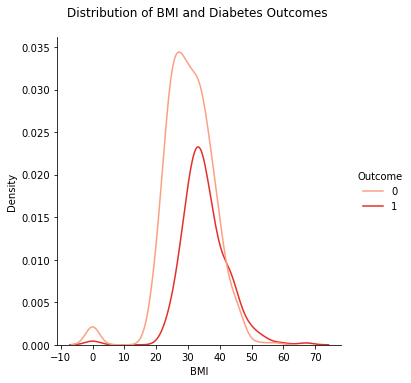

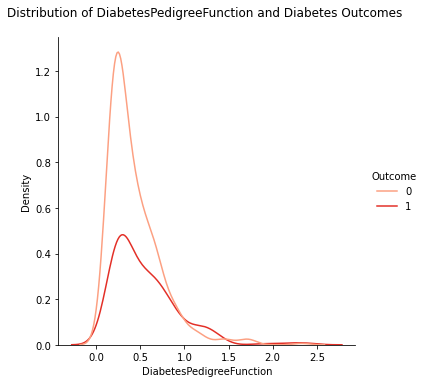

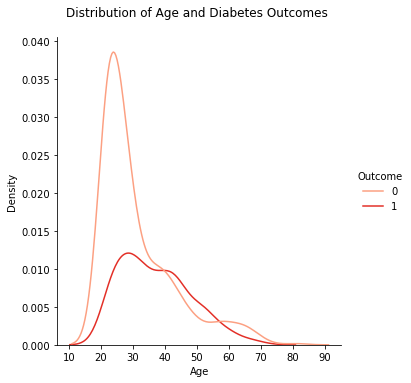

In [7]:
# Iterating through the columns and plotting a distribution plot using Seaborn, differentiating
# the distribution in each plot by having two colors (hue) correspond to the two outcomes and 
# specifying we want to use kernal density estimation 'kde'
for col in data.drop('Outcome',1).columns:
        sns.displot(data = data, x = col,hue = 'Outcome',kind='kde', palette='Reds')
        titlestring = "Distribution of " + col + " and Diabetes Outcomes \n"
        plt.title(titlestring)
    
plt.show()
    

Many of the feature distributions seem to be positively, or right, skewed (a statistic describing the data distribution shape or the symmetry of a certain overall value distribution) such as the Pregnancies, DiabetesPedigreeFunction, and Age due to to the presence of a tail on the right side of the distribution which means the presence of outliers are more towards the right. 

We can see in some of the graphs the influence of zero values within the dataset. As a result, in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI graphs we can see a bimodal distribution (two curves) in both outcomes in which one of the curves is over the density of the zero values. However, if these zero values were ignored making most of the distributions unimodal, it seems that the two most correlated features with Outcome according to the heatmap, Glucose for Outcome 0 and BMI for both outcomes almost follow a normal distribution (but may not actually be normally distributed); BloodPressure for both outcomes also seems to follow a normal distribution while SkinThickness may be slightly positively skewed and Insulin is definitely positively skewed. 

We will do some data preprocessing to look at alternative ways we can represent and modify the data as a result of these zero values that have an effect on the distribution of the data.

# Data Preprocessing

We will make another dataframe with the same data except rows with an entry of zero in certain columns where a zero is a questionable finding, especially since these zero values are not acknowledged by the creators of the dataset. For instance, nearly half of the Insulin column has entries of zero which is a concerning observation especially since an Insulin level of zero might be in a person with untreated Type 1 diabetes, but in the dataset patients with insulin levels of zero are mixed in regards to their outcome of diabetes. As a result, we will have a total of three dataframes that we will train machine learning models on-- the original data, data without the rows that contain zero entries in columns where an entry of zero can be questionable, and a dataframe replacing these zero entries with the median value of its column.

The reason we want to use all three representations/modifications of the data as opposed to choosing one is because a large number of zero values are present in some of the columns meaning that if we only use the data without the zero values then we'd have a significantly smaller dataset to work with and if we were to use the data that replaces these zeroes with median values then we have fabricated/modified majority of the data which reduces the authenticity of the data. As a result, we think it's better to be able to build models on all three dataframes and compare model accuracy on them which allows for more fruitful results.

Since we already have our original dataset, we will now create the remaining two.

In [8]:
# Removing the rows that have an entry of zero in the columns 'Glucose', 'BloodPressure', 
# 'SkinThickness', 'Insulin', and 'BMI' column 
remove_zero_data = data
remove_zero_data = remove_zero_data[(remove_zero_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]
remove_zero_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Replacing the zero values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' 
# columns with the median of its column
replace_zero_data = data
replace_zero_data['Glucose']=replace_zero_data['Glucose'].replace(0,replace_zero_data['Glucose'].median())
replace_zero_data['BloodPressure']=replace_zero_data['BloodPressure'].replace(0,replace_zero_data['BloodPressure'].median())
replace_zero_data['SkinThickness']=replace_zero_data['SkinThickness'].replace(0,replace_zero_data['SkinThickness'].median())
replace_zero_data['Insulin']=replace_zero_data['Insulin'].replace(0,replace_zero_data['Insulin'].median())
replace_zero_data['BMI']=replace_zero_data['BMI'].replace(0,replace_zero_data['BMI'].median())
replace_zero_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now that we have our three dataframes, we will do some hypothesis testing.

# Hypothesis Testing

Hypothesis testing is used to support ["the certainty of findings"](https://towardsdatascience.com/hypothesis-testing-for-data-scientists-everything-you-need-to-know-8c36ddde4cd2) where a null and alternative hypothesis, essentially two mutually exclusive statements, are evaluated in order to see which hypothesis the sample data best supports. There are parametric and non-parametric hypothesis tests where the difference lies in the distribution of the data. Parametric tests are used on data with a normal distribution while non-parametric tests are used on the opposite. 

Although we made some inferences on data distribution using distribution plots earlier, we will utilize Scipy's normaltest function to ensure whether each feature is/isn't normally distributed in regards to each outcome. We do this in order to determine whether we should use a parametric or non-parametric test on our data to reject or fail to reject our null hypothesis. We decide whether the null hypothesis is rejected or not through the p-value result from the hypothesis test. The p-value is ["the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct"](https://www.investopedia.com/terms/p/p-value.asp). The alternative hypothesis is more likely to be supported by stronger evidence than the null hypothesis when the p-value is lower. Statistical significance is commonly defined as a p-value of 0.05 or less, so we will use this as our significance level to reject the null hypothesis.

### Testing Normality of Data

In [10]:
# Splitting the data into two dataframes based on outcome
outcome_0_data = data[data['Outcome'] == 0]
outcome_1_data = data[data['Outcome'] == 1]

# Arrays that will store the column names + outcome depending on their distribution
normaldist = []
notnormaldist = []

# Iterating through all of the columns and using the normaltest function to test the
# distribution of data for each column/feature and outcome by getting the pvalue and
# placing the name of the column and outcome in the appropriate array
for col in data.columns:
    if col != 'Outcome':
        pval0 = normaltest(outcome_0_data[col])[1]
        pval1 = normaltest(outcome_1_data[col])[1]
        if pval0 <= 0.05:
            col_and_outcome = col + ' Outcome 0'
            notnormaldist.append(col_and_outcome)
        else:
            col_and_outcome = col + ' Outcome 0'
            normaldist.append(col_and_outcome)
        if pval1 <= 0.05:
            col_and_outcome = col + ' Outcome 1'
            notnormaldist.append(col_and_outcome)
        else:
            col_and_outcome = col + ' Outcome 1'
            normaldist.append(col_and_outcome)
            
print("Normal Distribution:\n", normaldist)
print("Not Normal Distribution:\n", notnormaldist)

Normal Distribution:
 []
Not Normal Distribution:
 ['Pregnancies Outcome 0', 'Pregnancies Outcome 1', 'Glucose Outcome 0', 'Glucose Outcome 1', 'BloodPressure Outcome 0', 'BloodPressure Outcome 1', 'SkinThickness Outcome 0', 'SkinThickness Outcome 1', 'Insulin Outcome 0', 'Insulin Outcome 1', 'BMI Outcome 0', 'BMI Outcome 1', 'DiabetesPedigreeFunction Outcome 0', 'DiabetesPedigreeFunction Outcome 1', 'Age Outcome 0', 'Age Outcome 1']


We can see that all of the features for both outcomes in the original data have a p-value less than or equal to 0.05 meaning they all do not have a normal distribution. 

Now let's repeat the process for the other two dataframes

In [11]:
# Repeating process for the dataframe with zeroes removed
outcome_0_remove_zero_data = remove_zero_data[remove_zero_data['Outcome'] == 0]
outcome_1_remove_zero_data = remove_zero_data[remove_zero_data['Outcome'] == 1]

normaldist = []
notnormaldist = []

for col in remove_zero_data.columns:
    if col != 'Outcome':
        pval0 = normaltest(outcome_0_remove_zero_data[col])[1]
        pval1 = normaltest(outcome_1_remove_zero_data[col])[1]
        if pval0 <= 0.05:
            col_and_outcome = col + ' Outcome 0'
            notnormaldist.append(col_and_outcome)
        else:
            col_and_outcome = col + ' Outcome 0'
            normaldist.append(col_and_outcome)
        if pval1 <= 0.05:
            col_and_outcome = col + ' Outcome 1'
            notnormaldist.append(col_and_outcome)
        else:
            col_and_outcome = col + ' Outcome 1'
            normaldist.append(col_and_outcome)
            
print("Dataframe with Zeroes Removed\n")            
print("Normal Distribution:\n", normaldist)
print("Not Normal Distribution:\n", notnormaldist, "\n")

# Repeating process for the dataframe with zeroes replaced by median values
outcome_0_replace_zero_data = replace_zero_data[replace_zero_data['Outcome'] == 0]
outcome_1_replace_zero_data = replace_zero_data[replace_zero_data['Outcome'] == 1]

normaldist = []
notnormaldist = []

for col in replace_zero_data.columns:
    if col != 'Outcome':
        pval0 = normaltest(outcome_0_replace_zero_data[col])[1]
        pval1 = normaltest(outcome_1_replace_zero_data[col])[1]
        if pval0 <= 0.05:
            col_and_outcome = col + ' Outcome 0'
            notnormaldist.append(col_and_outcome)
        else:
            col_and_outcome = col + ' Outcome 0'
            normaldist.append(col_and_outcome)
        if pval1 <= 0.05:
            col_and_outcome = col + ' Outcome 1'
            notnormaldist.append(col_and_outcome)
        else:
            col_and_outcome = col + ' Outcome 1'
            normaldist.append(col_and_outcome)
            
print("Dataframe with Zeroes Replaced by Median\n")            
print("Normal Distribution:\n", normaldist)
print("Not Normal Distribution:\n", notnormaldist)

Dataframe with Zeroes Removed

Normal Distribution:
 ['BloodPressure Outcome 0', 'BloodPressure Outcome 1', 'SkinThickness Outcome 1']
Not Normal Distribution:
 ['Pregnancies Outcome 0', 'Pregnancies Outcome 1', 'Glucose Outcome 0', 'Glucose Outcome 1', 'SkinThickness Outcome 0', 'Insulin Outcome 0', 'Insulin Outcome 1', 'BMI Outcome 0', 'BMI Outcome 1', 'DiabetesPedigreeFunction Outcome 0', 'DiabetesPedigreeFunction Outcome 1', 'Age Outcome 0', 'Age Outcome 1'] 

Dataframe with Zeroes Replaced by Median

Normal Distribution:
 []
Not Normal Distribution:
 ['Pregnancies Outcome 0', 'Pregnancies Outcome 1', 'Glucose Outcome 0', 'Glucose Outcome 1', 'BloodPressure Outcome 0', 'BloodPressure Outcome 1', 'SkinThickness Outcome 0', 'SkinThickness Outcome 1', 'Insulin Outcome 0', 'Insulin Outcome 1', 'BMI Outcome 0', 'BMI Outcome 1', 'DiabetesPedigreeFunction Outcome 0', 'DiabetesPedigreeFunction Outcome 1', 'Age Outcome 0', 'Age Outcome 1']


We can see that the data modified to have the zero values in certain columns replaced by the median has all of the features not normally distributed in regards to outcomes. However, the dataframe with the zeroes removed instead of replaced has three normal distributions-- BloodPressure for both outcomes and SkinThickness for Outcome 1. Earlier, when looking at the distribution plots, we had correctly suspected that BloodPressure for both outcomes would be normally distributed without the zero values and incorrectly suspected SkinThickness to be skewed. This highlights the importance of revisting claims made in previous parts of the data science process and using statistical tests to make judgements or claims regarding data because it's more reliable than trying to make educated guesses without proof to support it.

### Mann-Whitney U and Independent T tests

We will now use the [Mann-Whitney U test](https://towardsdatascience.com/non-parametric-tests-in-hypothesis-testing-138d585c3548), a non-parametric test, to compare the data of the two outcomes that aren't normally distributed and use the [Independent T test](https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62), the parametric equivalent to the Mann Whitney test, to compare the BloodPressure data in the Removed Zeroes dataframe. We will utilize these tests to test our hypothesis below:

### H0: 
#### Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age are not higher (distribution / mean) in patients that have diabetes.

### H1: 
#### Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age are higher (distribution / mean) in patients that have diabetes.

H0 denotes the null hypothesis while H1 denotes the alternative hypothesis. After conducting the statistical tests mentioned, we will compare the p-values with 0.05 to determine whether to reject/accept the null hypothesis (reject if p-value <= 0.05, fail to reject otherwise).

In [12]:
print("Original Data \n")
# Arrays that will store the names of features that either reject or fail to reject H0
reject = []
fail_to_reject = []
# Iterating through the columns to do the Mann-Whitney test and get the p-value to see if
# it's <= 0.05
for col in data.columns:
    if col != 'Outcome':
        # alternative = 'greater' means that the alternative hypothesis is defined as
        # the distribution underlying x is stochastically greater than the distribution underlying y;
        # x being outcome_1_data and y being outcome_0_data
        manwhit_pvalue = mannwhitneyu(outcome_1_data[col], outcome_0_data[col], \
                                      alternative = 'greater')[1]
        if manwhit_pvalue <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
print("Reject:", reject)
print("Fail to Reject:", fail_to_reject, "\n")

# Repeat above process for median data
print("Median Data \n")
reject = []
fail_to_reject = []
for col in replace_zero_data.columns:
    if col != 'Outcome':
        manwhit_pvalue = mannwhitneyu(outcome_1_replace_zero_data[col], \
                                      outcome_0_replace_zero_data[col], alternative = 'greater')[1]
        if manwhit_pvalue <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
print("Reject:", reject)
print("Fail to Reject:", fail_to_reject, "\n")

# Repeat above process for removed zero data with the addition of conducting Independent T test
print("Removed Zero Data \n")                    
reject = []
fail_to_reject = []
for col in remove_zero_data.columns:
    if col != 'Outcome' and col != 'BloodPressure':
        manwhit_pvalue = mannwhitneyu(outcome_1_remove_zero_data[col], \
                                      outcome_0_remove_zero_data[col], alternative = 'greater')[1]
        if manwhit_pvalue <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
    # Independent T test for BloodPressure
    elif col == 'BloodPressure':
        ttest_pvalue = ttest_ind(outcome_1_remove_zero_data[col], \
                                 outcome_0_remove_zero_data[col], alternative = 'greater')[1]
        if ttest_pvalue <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
print("Reject:", reject)
print("Fail to Reject:", fail_to_reject)

Original Data 

Reject: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Fail to Reject: [] 

Median Data 

Reject: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Fail to Reject: [] 

Removed Zero Data 

Reject: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Fail to Reject: []


After performing the Mann-Whitney U and Independent T tests, we can see that all of the p-values were statistically significant (<= 0.05) meaning that we reject the null hypothesis for all of the features and can conclude that Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age are all higher (mean) for patients with diabetes than patients that don't have diabetes across all three of the dataframes. This is consistent with what we saw in the boxplots of the original data where the median and upper quartile was higher for outcome 1 than outcome 0 for all of the features. Consequently, there seems to be a trend between the diabetes outcome and higher levels of the features.

### Spearman Rank Correlation Coefficient

Let's revisit the idea of correlation between the features and outcomes as a whole across the three dataframes to see if this apparent trend may hint at correlation through the [Spearman Rank Correlation Coefficient](https://towardsdatascience.com/pearson-and-spearman-rank-correlation-coefficient-explained-60811e61185a), a non-parametric measure of rank correlation, that tests two variables' strength and direction of correlation.

### H0: 
#### The correlation between features and outcome is zero or not positive.

### H1: 
#### The correlation between features and outcome is positive.

In [13]:
print("Original Data \n")
reject = []
fail_to_reject = []
# Iterating through the columns to do the Spearman test and get the p-value to see if
# it's <= 0.05
for col in data.columns:
    if col != 'Outcome':
        # alternative = 'greater' means that the alternative hypothesis is defined as
        # the correlation is positive (greater than zero)
        spearman_results = spearmanr(data[col], data['Outcome'], \
                                      alternative = 'greater')
        pval = spearman_results[1]
        print(col,":", spearman_results)
        if pval <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
print("\nReject:", reject)
print("Fail to Reject:", fail_to_reject, "\n")

# Repeat above process for median data
print("Median Data \n")
reject = []
fail_to_reject = []
for col in replace_zero_data.columns:
    if col != 'Outcome':
        spearman_results = spearmanr(replace_zero_data[col], \
                                     replace_zero_data['Outcome'], alternative = 'greater')
        pval = spearman_results[1]
        print(col,":", spearman_results)
        if pval <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
print("\nReject:", reject)
print("Fail to Reject:", fail_to_reject, "\n")

# Repeat above process for removed zeroes data
print("Removed Zero Data \n")                    
reject = []
fail_to_reject = []
for col in remove_zero_data.columns:
    if col != 'Outcome':
        spearman_results = spearmanr(remove_zero_data[col], \
                                     remove_zero_data['Outcome'], alternative = 'greater')
        pval = spearman_results[1]
        print(col,":", spearman_results)
        if pval <= 0.05:
            reject.append(col)
        else:
            fail_to_reject.append(col)
print("\nReject:", reject)
print("Fail to Reject:", fail_to_reject)

Original Data 

Pregnancies : SpearmanrResult(correlation=0.19868874913189663, pvalue=1.4063922395649354e-08)
Glucose : SpearmanrResult(correlation=0.4813968963350598, pvalue=4.20050321489302e-46)
BloodPressure : SpearmanrResult(correlation=0.1708324018917003, pvalue=9.60417975088519e-07)
SkinThickness : SpearmanrResult(correlation=0.1966084477604776, pvalue=1.971318139766496e-08)
Insulin : SpearmanrResult(correlation=0.0747519433225385, pvalue=0.019174226987829963)
BMI : SpearmanrResult(correlation=0.3073382077773797, pvalue=1.4520901823689255e-18)
DiabetesPedigreeFunction : SpearmanrResult(correlation=0.17535346981239172, pvalue=5.053170547826717e-07)
Age : SpearmanrResult(correlation=0.30904026356718634, pvalue=9.264872122688206e-19)

Reject: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Fail to Reject: [] 

Median Data 

Pregnancies : SpearmanrResult(correlation=0.19868874913189663, pvalue=1.4063922395649354e-08)
G

The result of the Spearman Rank Correlation Coefficient shows us that not only are the features correlated with outcome but that they are positively correlated across all three dataframes. We can see that none of the features were added to the Fail to Reject array because all of the p-values were less than or equal to 0.05 meaning that the correlation between features and outcome is statistically significant so we can reject the null hypothesis.

We conclude our hypothesis testing that has allowed us to make supported claims regarding our findings to move onto building the models for our data.

# Predicting Diabetes Outcome

We will now develop machine learning models to predict the diabetes outcome of patients in the dataset. Using preexisting algorithms, we will produce a model that will make an outcome prediction when given information. There are many algorithms to choose from; however, we decided to use the classification models Random Forest, K-Nearest Neighbor (kNN), and Support Vector Machine (SVM).

[Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) is a more versatile version of the decision tree, eliminating overfitting datasets and increasing accuracy. Both decision tree and random forest can handle missing data much better than other algorithms, and is overall faster to predict results due to the logorithmic size of the trees. However, the model takes a lot of resources to produce due to making several objects, and the model is far less interpretable than decision tree. 

We are expecting Random Forest to produce the best results for our dataset due to its versatility.


[kNN](https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f) is a intuitive and simple algorithm to visualize, with many variations to the algorithm embedded in the distance metrics used. However, it is sensitive to poorly matched features and has difficulty handling too much data at once, and generally favors matching one data over the other. It also handles high dimensions poorly, as there is a risk of overfitting.

kNN is a common algorithm used in many datasets, thus we want to see how accurate this algorithm can be in a situation it may struggle in.


SVMs are ["the go-to method for a high performing algorithm with little tuning."](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589) They are more effective in datasets with high dimensions and clear margins between classes, and are generally more computationally friendly. It struggles with overlapping classes and becomes resource demanding in large datasets. 
We want to see how SVM would perform in a medium dimension and large dataset.

In producing a model using an algorithm, there are several parameters that can be adjusted to produce a different model, named hyperparameters, which should be adjusted and tuned to produce the best model for our purpose, called hyperparameter tuning. Since manually testing each combination of hyperparameters is time consuming, we use grid search to test each combination and return the best result.

Hyperparameter tuning will be scored by recall. Recall is the percentage of true positives that is actually marked as true positive. In this situation, we are trying to decrease false negatives. If a diabetic individual was not detected as diabetic -- a false negative -- they could be harmed due to not being given care. Thus we are concerned about the recall score of category 1.

We will not be entirely prioritizing the recall score of category 1, since if a model answers 1 for every data set, the recall for category 1 will technically be 100%. We will also be looking at accuracy overall.

We will run the model algorithms through 3 differently preprocessed datasets: Replaced zeroes dataset, original dataset, and removed zeroes dataset. Each algorithm has an ideal preprocessing method that allows an ideal model, thus we will compare the results of our models for each dataset.

### Replaced Zeroes Dataset

First we will split our data into training and testing data for the replaced zeroes with median dataframe. 25% of the data will be reserved for verifying the quality of our model.

In [14]:
# Initialize X and Y test and train groups
X = replace_zero_data.loc[:, replace_zero_data.columns != 'Outcome']
y = replace_zero_data.loc[:,'Outcome'].values
f2_score = make_scorer(fbeta_score, beta=2, pos_label=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forest Classifier

In [15]:
# Random Forest Classifier for replaced zero dataset
replace_zero_forest = RandomForestClassifier(random_state=0)

# Fit model to training data
replace_zero_forest.fit(X_train, y_train)

# See how model does on testing data
rzf_pred = replace_zero_forest.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, rzf_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzf_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzf_pred))
print ('Classification Report:\n', classification_report(y_test, rzf_pred))

ROC AUC: 0.7317073170731707
Accuracy: 0.75
Confusion Matrix:
 [[98 25]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       123
           1       0.65      0.67      0.66        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



Random Forest has the best results than any other algorithm.

### Random Forest (Hyperparameter tuning)

In [16]:
# Specifying the hyperparameters 
rzf_param_grid = {'max_samples':[0.1, 0.2, 0.3, 0.4],
                 'max_features': [1, 2],
                 'n_estimators':[5, 10, 50, 100],
                 'max_depth':[8, 9, 10]
                 }
# Splitting data into 5 folds, or 5 sections to do 5-fold cross validation
rzf_cv = KFold(n_splits=5)
# Using grid search
rzf_grid = GridSearchCV(RandomForestClassifier(), rzf_param_grid, cv=rzf_cv, scoring = f2_score)
rzf_grid.fit(X_train, y_train)
# This should take half a minute

print('Random Forest best Params:', rzf_grid.best_params_)
print('Random Forest best Score:', rzf_grid.best_score_)

hrzf_pred = rzf_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, hrzf_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, hrzf_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, hrzf_pred))
print ('Classification Report:\n', classification_report(y_test, hrzf_pred))

Random Forest best Params: {'max_depth': 9, 'max_features': 2, 'max_samples': 0.3, 'n_estimators': 100}
Random Forest best Score: 0.6155776749158334
ROC AUC: 0.6891127606928242
Accuracy: 0.7239583333333334
Confusion Matrix:
 [[100  23]
 [ 30  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       123
           1       0.63      0.57      0.60        69

    accuracy                           0.72       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192



Notably, the best hyperparameters for our dataset changes every iteration, although our best score rarely changes.

Curiously, while the scorer prioritizes recall for value 1 and has succeed in increase recall for class 1 in subsequent algorithms, in this case, the recall actually decreases, although accuracy has increased overall.

### k-NN Classifier

In [17]:
rep_zero_kNN = KNeighborsClassifier(n_neighbors = 10)
# Fitting model to training data
rep_zero_kNN.fit(X_train, y_train)
# See how model does on testing data
rzk_pred = rep_zero_kNN.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, rzk_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzk_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzk_pred))
print ('Classification Report:\n', classification_report(y_test, rzk_pred))

ROC AUC: 0.6633085896076353
Accuracy: 0.703125
Confusion Matrix:
 [[99 24]
 [33 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       123
           1       0.60      0.52      0.56        69

    accuracy                           0.70       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.70      0.70       192



### k-NN Classifier (Hyperparameter tuning)

In [18]:
# Specifying the hyperparameters 
kNN_param_grid = {'n_neighbors':[2,5,10,15,20,30,50],
                  'weights':['uniform', 'distance'], 
                  'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                  'metric':['minkowski','euclidean','manhattan']}
# do not use linear or poly for kernel, it will softlock your kernel
# Splitting data into 5 folds, or 5 sections to do 5-fold cross validation
kNN_cv = KFold(n_splits=5)
# Using grid search
kNN_grid = GridSearchCV(KNeighborsClassifier(), kNN_param_grid, cv=kNN_cv, scoring = f2_score)
kNN_grid.fit(X_train, y_train)
# This runs the smoothest

print('k-NN best Params:', kNN_grid.best_params_)
print('k-NN best Score:', kNN_grid.best_score_)

kNN_pred = kNN_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, kNN_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, kNN_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, kNN_pred))
print ('Classification Report:\n', classification_report(y_test, kNN_pred))

k-NN best Params: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
k-NN best Score: 0.5820232318924576
ROC AUC: 0.6240721102863201
Accuracy: 0.640625
Confusion Matrix:
 [[84 39]
 [30 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       123
           1       0.50      0.57      0.53        69

    accuracy                           0.64       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.65      0.64      0.64       192



The performance on kNN classifier is the worst out of our algorithms, and the increase to recall class 1 comes at the biggest decrease to accuracy we've seen.

### SVM

In [19]:
data_SVC = SVC()
# Fitting model to training data
data_SVC.fit(X_train, y_train)
# See how model does on testing data
svc_pred = data_SVC.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, svc_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, svc_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, svc_pred))
print ('Classification Report:\n', classification_report(y_test, svc_pred))

ROC AUC: 0.6772711205372923
Accuracy: 0.7291666666666666
Confusion Matrix:
 [[106  17]
 [ 35  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       123
           1       0.67      0.49      0.57        69

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.72      0.73      0.72       192



The recall for class 1 is the weakest in this algorithm, although it performs optimally otherwise. The recall for class 0 is actually the highest out of all others.

### SVM (Hyperparameter tuning)

In [20]:
# Specifying the hyperparameters 
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100], \
                  'kernel':['rbf'], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
# do not use linear or poly for kernel, it will softlock your kernel
# Splitting data into 5 folds, or 5 sections to do 5-fold cross validation
svm_cv = KFold(n_splits=5)
# Using grid search
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring = f2_score)
svm_grid.fit(X_train, y_train)

print('SVM best Params:', svm_grid.best_params_)
print('SVM best Score:', svm_grid.best_score_)

svm_pred = svm_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, svm_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, svm_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, svm_pred))
print ('Classification Report:\n', classification_report(y_test, svm_pred))

SVM best Params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVM best Score: 0.5796992942249825
ROC AUC: 0.7108518911276069
Accuracy: 0.7395833333333334
Confusion Matrix:
 [[100  23]
 [ 27  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



Note that while SVM has more hyperparameter options for the kernel we could've included such as 'linear' and 'poly', due to SVM being better fitted to smaller datasets, the cell will not run to completion in a reasonable time. Thus the options has been omitted in hyperparameter tuning.

Our hyperparameter adjusted random forest has the highest accuracy of all of our algorithms.

The accuracy and recall rates we have for all of our algorithms are relatively low, which supports the fact that there is significant overlap in the outer health of non-diabetic and diabetic patients. Notably, the precision, recall, and f1-score for diabetic patients is lower than those for non-diabetic patients in all of our models, indicating a generally lower probability of recognizing a diabetic patient.

## Original Dataset

Now we will repeat the same process with the original data, without 0 values removed.

In [21]:
# Initialize X and Y test and train groups
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:,'Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [22]:
# Random Forest Classifier for original dataset
original_forest = RandomForestClassifier(random_state=0)
original_forest.fit(X_train, y_train)
rzf_pred = original_forest.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, rzf_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzf_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzf_pred))
print ('Classification Report:\n', classification_report(y_test, rzf_pred))

ROC AUC: 0.7353535353535354
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



The accuracy overall and recall for class 1 has actually increased.

### Random Forest (Hyperparameter tuning)

In [23]:
rzf_param_grid = {'max_samples':[0.1, 0.2, 0.3, 0.4],
                 'max_features': [1, 2],
                 'n_estimators':[5, 10, 50, 100],
                 'max_depth':[8, 9, 10]
                 }
rzf_cv = KFold(n_splits=5)
rzf_grid = GridSearchCV(RandomForestClassifier(), rzf_param_grid, cv=rzf_cv, scoring = f2_score)
rzf_grid.fit(X_train, y_train)
# This should take half a minute

print('Random Forest best Params:', rzf_grid.best_params_)
print('Random Forest best Score:', rzf_grid.best_score_)

rzf_pred = rzf_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, rzf_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzf_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzf_pred))
print ('Classification Report:\n', classification_report(y_test, rzf_pred))

Random Forest best Params: {'max_depth': 9, 'max_features': 2, 'max_samples': 0.4, 'n_estimators': 5}
Random Forest best Score: 0.6235982694211986
ROC AUC: 0.7161616161616162
Accuracy: 0.7337662337662337
Confusion Matrix:
 [[77 22]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



This is our best performing model so far.

### k-NN

In [24]:
# k-NN Classifier for original dataset
original_kNN = KNeighborsClassifier()
original_kNN.fit(X_train, y_train)
rzk_pred = original_kNN.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, rzk_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzk_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzk_pred))
print ('Classification Report:\n', classification_report(y_test, rzk_pred))

ROC AUC: 0.6474747474747474
Accuracy: 0.6558441558441559
Confusion Matrix:
 [[67 32]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        99
           1       0.52      0.62      0.56        55

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.66      0.66       154



### k-NN (Hyperparameter tuning)

In [25]:
kNN_param_grid = {'n_neighbors':[2,5,10,15,20,30,50],
                  'weights':['uniform', 'distance'], 
                  'metric':['minkowski','euclidean','manhattan']}
# do not use linear or poly for kernel, it will softlock your kernel
kNN_cv = KFold(n_splits=5)
kNN_grid = GridSearchCV(KNeighborsClassifier(), kNN_param_grid, cv=kNN_cv, scoring = f2_score)
kNN_grid.fit(X_train, y_train)
# This runs the smoothest

print('k-NN best Params:', kNN_grid.best_params_)
print('k-NN best Score:', kNN_grid.best_score_)
kNN_pred = kNN_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, kNN_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, kNN_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, kNN_pred))
print ('Classification Report:\n', classification_report(y_test, kNN_pred))

k-NN best Params: {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}
k-NN best Score: 0.5816168275146515
ROC AUC: 0.6828282828282828
Accuracy: 0.7012987012987013
Confusion Matrix:
 [[74 25]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



### SVM

In [26]:
# SVM for original dataset
data_SVC = SVC()
data_SVC.fit(X_train, y_train)
svc_pred = data_SVC.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, svc_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, svc_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, svc_pred))
print ('Classification Report:\n', classification_report(y_test, svc_pred))

ROC AUC: 0.7212121212121211
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[87 12]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



### SVM (Hyperparameter tuning)

In [27]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100], \
                  'kernel':['rbf'], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
# do not use linear or poly for kernel, it will softlock your kernel
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring = f2_score)
svm_grid.fit(X_train, y_train)

print('SVM best Params:', svm_grid.best_params_)
print('SVM best Score:', svm_grid.best_score_)

svm_pred = svm_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, svm_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, svm_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, svm_pred))
print ('Classification Report:\n', classification_report(y_test, svm_pred))

SVM best Params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVM best Score: 0.5481925824111564
ROC AUC: 0.6818181818181819
Accuracy: 0.6948051948051948
Confusion Matrix:
 [[72 27]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        99
           1       0.56      0.64      0.60        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154



Overall, the original dataset performed worse for most algorithms. The hyperparameter tuned random forest however, had the highest performing model so far, with a 67% recall for class 1 and 77% accuracy. While we expected that random forest could handle missing data better than most algorithms, we did not expect an improvement to results.

## Removed Zeroes Dataset

Now we will repeat the same process with the dataframe that has the zeroes removed. Due to our dataset being much smaller than before, we will be using a smaller percentage of the dataset to be our test group. The results of this test should also be scrutinized, as we are working with a much smaller dataset, with a chance of higher percentages due to a small set of data.

In [28]:
# Initialize X and Y test and train groups
X = remove_zero_data.loc[:, remove_zero_data.columns != 'Outcome']
y = remove_zero_data.loc[:,'Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Random Forest

In [29]:
# Random Forest Classifier for removed zeroes dataset
remove_zero_data_forest = RandomForestClassifier(random_state=0)
remove_zero_data_forest.fit(X_train, y_train)
rzf_pred = remove_zero_data_forest.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, rzf_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzf_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzf_pred))
print ('Classification Report:\n', classification_report(y_test, rzf_pred))

ROC AUC: 0.7330827067669173
Accuracy: 0.7796610169491526
Confusion Matrix:
 [[34  4]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.75      0.57      0.65        21

    accuracy                           0.78        59
   macro avg       0.77      0.73      0.74        59
weighted avg       0.78      0.78      0.77        59



The accuracy for this model is the highest out of all other datasets and models, although it is important to consider the much smaller size of our dataset.

### Random Forest (Hyperparameter Tuning)

In [30]:
rzf_param_grid = {'max_samples':[0.1, 0.2, 0.3, 0.4],
                 'max_features': [1, 2],
                 'n_estimators':[5, 10, 50, 100],
                 'max_depth':[8, 9, 10]
                 }
rzf_cv = KFold(n_splits=5)
rzf_grid = GridSearchCV(RandomForestClassifier(), rzf_param_grid, cv=rzf_cv, scoring = f2_score)
rzf_grid.fit(X_train, y_train)
# This should take half a minute

print('Random Forest best Params:', rzf_grid.best_params_)
print('Random Forest best Score:', rzf_grid.best_score_)

rzf_pred = rzf_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, rzf_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzf_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzf_pred))
print ('Classification Report:\n', classification_report(y_test, rzf_pred))

Random Forest best Params: {'max_depth': 9, 'max_features': 2, 'max_samples': 0.4, 'n_estimators': 5}
Random Forest best Score: 0.6024608091655231
ROC AUC: 0.7199248120300752
Accuracy: 0.7627118644067796
Confusion Matrix:
 [[33  5]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.71      0.57      0.63        21

    accuracy                           0.76        59
   macro avg       0.75      0.72      0.73        59
weighted avg       0.76      0.76      0.76        59



Just like in the replaced zeroes dataset, the quality of our model has actually decreased. Random forest appears to be hindered by preprocessed datasets.

### k-NN

In [31]:
# k-NN Classifier for removed zero dataset
remove_zero_kNN = KNeighborsClassifier()
remove_zero_kNN.fit(X_train, y_train)
rzk_pred = remove_zero_kNN.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, rzk_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, rzk_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, rzk_pred))
print ('Classification Report:\n', classification_report(y_test, rzk_pred))

ROC AUC: 0.6672932330827068
Accuracy: 0.6949152542372882
Confusion Matrix:
 [[29  9]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.57      0.57      0.57        21

    accuracy                           0.69        59
   macro avg       0.67      0.67      0.67        59
weighted avg       0.69      0.69      0.69        59



### k-NN (Hyperparameter tuning)

In [32]:
kNN_param_grid = {'n_neighbors':[2,5,10,15,20,30,50],
                  'weights':['uniform', 'distance'], 
                  'metric':['minkowski','euclidean','manhattan']}
# do not use linear or poly for kernel, it will softlock your kernel
kNN_cv = KFold(n_splits=5)
kNN_grid = GridSearchCV(KNeighborsClassifier(), kNN_param_grid, cv=kNN_cv, scoring=f2_score)
kNN_grid.fit(X_train, y_train)
# This runs the smoothest

print('k-NN best Params:', kNN_grid.best_params_)
print('k-NN best Score:', kNN_grid.best_score_)

kNN_pred = kNN_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, kNN_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, kNN_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, kNN_pred))
print ('Classification Report:\n', classification_report(y_test, kNN_pred))

k-NN best Params: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
k-NN best Score: 0.5848404497630284
ROC AUC: 0.6672932330827068
Accuracy: 0.6949152542372882
Confusion Matrix:
 [[29  9]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.57      0.57      0.57        21

    accuracy                           0.69        59
   macro avg       0.67      0.67      0.67        59
weighted avg       0.69      0.69      0.69        59



There was no change in the hyperparameter tuned k-NN and the original k-NN, possibly indicating any increase to recall for class 1 will disproportionally affect accuracy.

### SVM

In [33]:
# SVM for removed zeroes dataset
data_SVC = SVC()
data_SVC.fit(X_train, y_train)
svc_pred = data_SVC.predict(X_test)

print ('ROC AUC:', roc_auc_score(y_test, svc_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, svc_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, svc_pred))
print ('Classification Report:\n', classification_report(y_test, svc_pred))

ROC AUC: 0.6879699248120301
Accuracy: 0.7627118644067796
Confusion Matrix:
 [[36  2]
 [12  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        38
           1       0.82      0.43      0.56        21

    accuracy                           0.76        59
   macro avg       0.78      0.69      0.70        59
weighted avg       0.77      0.76      0.74        59



The recall for class 0 is the highest out of all datasets and models, but the recall for class 1 is the lowest out of all datasets and models.

### SVM (Hyperparameter tuning)

In [34]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100], \
                  'kernel':['rbf'], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
# do not use linear or poly for kernel, it will softlock your kernel
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring=f2_score)
svm_grid.fit(X_train, y_train)

print('SVM best Params:', svm_grid.best_params_)
print('SVM best Score:', svm_grid.best_score_)

svm_pred = svm_grid.predict(X_test)
print ('ROC AUC:', roc_auc_score(y_test, svm_pred, average=None))
print ('Accuracy:', accuracy_score(y_test, svm_pred))
print ('Confusion Matrix:\n', confusion_matrix(y_test, svm_pred))
print ('Classification Report:\n', classification_report(y_test, svm_pred))

SVM best Params: {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
SVM best Score: 0.5797285359397277
ROC AUC: 0.6854636591478697
Accuracy: 0.7457627118644068
Confusion Matrix:
 [[34  4]
 [11 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        38
           1       0.71      0.48      0.57        21

    accuracy                           0.75        59
   macro avg       0.73      0.69      0.70        59
weighted avg       0.74      0.75      0.73        59



Some processing methods of remove zeros lead to the imbalance of sample labels, which will lead to overfitting of samples with a large proportion, that is to say, the prediction is biased towards the classification with a large number of samples. This will greatly reduce the generalization ability of the model. While a few performance metrics are higher than other models from other preprocessed datasets, the overall performance was worse. The recall for class 1 is also lower than any other models.

Our best performing model and dataset was the hyperparameter tuned random forest in the original dataset. While preprocessing is an important element in machine learning, removing or adjusting missing information could be detrimental to the quality of prediction models in certain situations and datasets.

In this tutorial, we developed Support Vector Machine, Random Forest and KNN classification models for diabetes data set. The hyperparameters of all the models were also tuned to optimize the performance of the classification model for all the algorithms.

# Conclusion

There isn’t a known cure for diabetes at this moment in time highlighting the importance of researching and studying potential risk factors or diagnostics that have some relationship or impact on diabetes. As a result, being able to predict diabetes outcome of patients in a dataset would help researchers better understand the disease by seeing which features have an impact on outcome and to what extent. A model like this could also be tweaked to communicate warning signs of someone who is on the pathway toward developing diabetes by looking at their health levels. We utilized three dataframes to represent the common ways data scientists modify (or don't) datasets that have many zero entries. We wanted to explore how using each dataframe could lead to similar or different results in regards to hypothesis testing and model building. We felt that this was important in learning the influence modifications of data can have on findings.

We created this tutorial to emulate the data science pipeline that allows for us to take data, do testing and analysis on  it, and communicate results in a way that others can understand. We were able to not only take a dataset and make visualizations out of it but also make inferences and educated guesses about relationships between variables supported by testing. Since this process was not linear, we revisited claims and previous parts of the process to build upon new findings such as the correlation between features and diabetes outcomes. Being able to utilize the data science pipeline is crucial to making and observing replicable results to make strides in research.  Although we do not have a completely accurate model to predict diabetes outcome, we have gained many new insights and skills that will serve as a foundation for future projects. 